In [4]:
import pandas as pd
import numpy as np
import glob

In [2]:
import glob

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as pp

In [10]:
import pyarrow

In [ ]:
from scipy import interpolate

In [16]:
cbg=pd.read_csv('cbg_list.csv')

In [17]:
cbg_list=list(cbg.blkgrpid)

In [2]:
date ={'2020-01-06':'1','2020-01-07':'2','2020-01-08':'3', '2020-01-09':'4', '2020-01-10':'5',
       '2020-01-13':'1','2020-01-14':'2','2020-01-15':'3', '2020-01-16':'4', '2020-01-17':'5',
       '2020-01-20':'1','2020-01-21':'2','2020-01-22':'3', '2020-01-23':'4', '2020-01-24':'5',
       '2020-01-27':'1','2020-01-28':'2','2020-01-29':'3', '2020-01-30':'4', '2020-01-31':'5',
       '2020-02-03':'1','2020-02-04':'2','2020-02-05':'3', '2020-02-06':'4', '2020-02-07':'5',
       '2020-02-10':'1','2020-02-11':'2','2020-02-12':'3', '2020-02-13':'4', '2020-02-14':'5',
       '2020-02-17':'1','2020-02-18':'2','2020-02-19':'3', '2020-02-20':'4', '2020-02-21':'5',
       '2020-02-24':'1','2020-02-25':'2','2020-02-26':'3', '2020-02-27':'4', '2020-02-28':'5',
       '2020-03-02':'1','2020-03-03':'2','2020-03-04':'3', '2020-03-05':'4', '2020-03-06':'5',
       '2020-03-09':'1','2020-03-10':'2','2020-03-11':'3', '2020-03-12':'4', '2020-03-13':'5',
       '2020-03-16':'1','2020-03-17':'2','2020-03-18':'3', '2020-03-19':'4', '2020-03-20':'5',
       '2020-03-23':'1','2020-03-24':'2','2020-03-25':'3', '2020-03-26':'4', '2020-03-27':'5',
       '2020-03-30':'1','2020-03-31':'2','2020-04-01':'3', '2020-04-02':'4', '2020-04-03':'5',
       '2020-04-06':'1','2020-04-07':'2','2020-04-08':'3', '2020-04-09':'4', '2020-04-10':'5',
       '2020-04-13':'1','2020-04-14':'2','2020-04-15':'3', '2020-04-16':'4', '2020-04-17':'5',
       '2020-04-20':'1','2020-04-21':'2','2020-04-22':'3', '2020-04-23':'4', '2020-04-24':'5',
       '2020-04-27':'1','2020-04-28':'2','2020-04-29':'3', '2020-04-30':'4', '2020-05-01':'5',
       '2020-05-04':'1','2020-05-05':'2','2020-05-06':'3', '2020-05-07':'4', '2020-05-08':'5',
       '2020-05-11':'1','2020-05-12':'2','2020-05-13':'3', '2020-05-14':'4', '2020-05-15':'5',
       '2020-05-18':'1','2020-05-19':'2','2020-05-20':'3', '2020-05-21':'4', '2020-05-22':'5',
       '2020-05-25':'1','2020-05-26':'2','2020-05-27':'3', '2020-05-28':'4', '2020-05-29':'5'
      }

In [19]:
file_dir='/projects/inrixdata/processed/nrel-csc-inrix-national-processed_20200723/od_pairs/census_block_group/hourly/vehicle_weight_class=2/'
df =pd.DataFrame(columns=['Ori','Dest','Trip','start_date','start_dow','start_hour'])
for key,value in date.items():
    for i in range(0,24):
        file_nm=file_dir+'start_date=%s/start_dow=%s/start_hour=%02d/' % (key, value,i)
        file_nm2 = glob.glob(file_nm+'*')[0]
        df_temp= pd.read_csv(file_nm2, compression='gzip', header=None, sep=',', quotechar='"', error_bad_lines=False)
        df_temp=df_temp.rename(columns={0:'Ori',1:'Dest',2:'Trip'})
        df_temp=df_temp[df_temp['Ori'].isin(cbg_list)]
        df_temp['start_date']=key
        df_temp['start_dow']=value
        df_temp['start_hour']=i
        df=df.append(df_temp)
table = pd.pivot_table(df, values=['Trip'], index=['start_hour'], columns=['start_dow'], aggfunc=np.sum, fill_value=0)        

In [49]:
dep_dist= pd.DataFrame()

In [50]:
temp_3=df.groupby(['start_hour'])['Trip'].sum().reset_index()

In [51]:
for cbg_id in cbg_list:
    try:
        temp = df[df.Ori == cbg_id]
        temp=temp.groupby(['start_hour'])['Trip'].sum().reset_index()
    except:
        temp = temp_3
    
    temp_2=pd.DataFrame(columns = ['cbg_id','start_hour','Trip_pdf'])
    temp_2.start_hour= np.arange(0,24)
    temp_2.cbg_id = cbg_id
    temp_2=temp_2.merge(temp, on='start_hour', how='left')
    temp_2.Trip = temp_2.Trip.fillna(0)
    temp_2.Trip_pdf = temp_2.Trip/np.sum(temp_2.Trip)
    dep_dist=pd.concat([dep_dist, temp_2],ignore_index=True)   

In [35]:
dep_dist.to_csv (r'depature_dist_by_cbg_MD.csv', index = False, header=True)

In [ ]:
file_dir='/projects/inrixdata/processed/nrel-csc-inrix-national-processed_20200723/od_pairs/census_block_group/hourly/vehicle_weight_class=3/'
df =pd.DataFrame(columns=['Ori','Dest','Trip','start_date','start_dow','start_hour'])
for key,value in date.items():
    for i in range(0,24):
        file_nm=file_dir+'start_date=%s/start_dow=%s/start_hour=%02d/' % (key, value,i)
        file_nm2 = glob.glob(file_nm+'*')[0]
        df_temp= pd.read_csv(file_nm2, compression='gzip', header=None, sep=',', quotechar='"', error_bad_lines=False)
        df_temp=df_temp.rename(columns={0:'Ori',1:'Dest',2:'Trip'})
        df_temp=df_temp[df_temp['Ori'].isin(cbg_list)]
        df_temp['start_date']=key
        df_temp['start_dow']=value
        df_temp['start_hour']=i
        df=df.append(df_temp)
table = pd.pivot_table(df, values=['Trip'], index=['start_hour'], columns=['start_dow'], aggfunc=np.sum, fill_value=0)        

In [ ]:
dep_dist= pd.DataFrame()
temp_3=df.groupby(['start_hour'])['Trip'].sum().reset_index()

In [ ]:
for cbg_id in cbg_list:
    try:
        temp = df[df.Ori == cbg_id]
        temp=temp.groupby(['start_hour'])['Trip'].sum().reset_index()
    except:
        temp = temp_3
    
    temp_2=pd.DataFrame(columns = ['cbg_id','start_hour','Trip_pdf'])
    temp_2.start_hour= np.arange(0,24)
    temp_2.cbg_id = cbg_id
    temp_2=temp_2.merge(temp, on='start_hour', how='left')
    temp_2.Trip = temp_2.Trip.fillna(0)
    temp_2.Trip_pdf = temp_2.Trip/np.sum(temp_2.Trip)
    dep_dist=pd.concat([dep_dist, temp_2],ignore_index=True)   

In [ ]:
dep_dist.to_csv (r'depature_dist_by_cbg_HD.csv', index = False, header=True)

In [ ]:
# code end for hpc run 

In [36]:
cbg_id

60014001001

In [37]:
try:
    temp = df[df.Ori == cbg_id]
    temp=temp.groupby(['start_hour'])['Trip'].sum().reset_index()
except:
    temp = temp_3

In [39]:
temp_2=pd.DataFrame(columns = ['cbg_id','start_hour','Trip_pdf'])
temp_2.start_hour= np.arange(0,24)
temp_2.cbg_id = cbg_id
temp_2=temp_2.merge(temp, on='start_hour', how='left')

In [41]:
temp_2.Trip = temp_2.Trip.fillna(0)

In [45]:
temp_2.Trip_pdf = temp_2.Trip/np.sum(temp_2.Trip)

In [47]:
dep_dist=pd.concat([dep_dist, temp_2],ignore_index=True)

In [48]:
dep_dist

,cbg_id,start_hour,Trip,Trip_pdf
0,60014001001,0,0,NaN
1,60014001001,1,0,NaN
2,60014001001,2,0,NaN
3,60014001001,3,0,NaN
4,60014001001,4,0,NaN
...,...,...,...,...
228307,60014001001,19,0,0.0
228308,60014001001,20,0,0.0
228309,60014001001,21,0,0.0
228310,60014001001,22,0,0.0


In [8]:
date ={'2020-02-09':'7',
       '2020-02-10':'1',
       '2020-02-11':'2',
       '2020-02-12':'3',
       '2020-02-13':'4',
       '2020-02-14':'5',
       '2020-02-15':'6'}

In [7]:
file_nm=file_dir+'start_date=2020-02-09/start_dow=7/start_hour=09/'
file_nm2 = glob.glob(file_nm+'*')[0]

In [8]:
df_temp= pd.read_csv(file_nm2, compression='gzip', header=None, sep=',', quotechar='"', error_bad_lines=False)

/Users/kjeong/anaconda3/envs/python38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df_temp.head()

,0,1,2
0,3.401702e+11,3.606100e+11,1
1,5.165001e+11,5.165001e+11,1
2,2.111101e+11,2.111101e+11,2
3,3.604711e+11,3.608101e+11,1
4,1.204997e+11,1.204997e+11,1


In [8]:
df =pd.DataFrame(columns=['Ori','Dest','Trip','start_date','start_dow','start_hour'])
for key,value in date.items():
    for i in range(0,24):
        file_nm=file_dir+'start_date=%s/start_dow=%s/start_hour=%02d/' % (key, value,i)
        file_nm2 = glob.glob(file_nm+'*')[0]
        df_temp= pd.read_csv(file_nm2, compression='gzip', header=None, sep=',', quotechar='"', error_bad_lines=False)
        df_temp=df_temp.rename(columns={0:'Ori',1:'Dest',2:'Trip'})
        df_temp=df_temp.query('Ori >= 470000000000 and Ori <=480000000000')
        df_temp['start_date']=key
        df_temp['start_dow']=value
        df_temp['start_hour']=i
        df=df.append(df_temp)

In [9]:
Trip_by_ori=df.groupby(['Ori','start_dow','start_hour'])['Trip'].agg('sum')

KeyboardInterrupt: 

In [89]:
#df_date=df[df.start_dow=='7']

In [95]:
#table = pd.pivot_table(df_date, values=['Trip'], index=['start_dow'], columns=['start_hour'], aggfunc=np.sum, fill_value=0)

In [10]:
table = pd.pivot_table(df, values=['Trip'], index=['start_hour'], columns=['start_dow'], aggfunc=np.sum, fill_value=0)

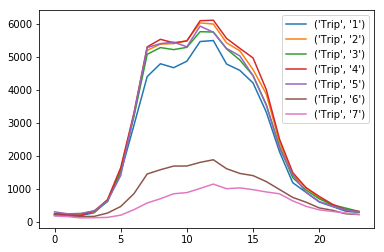

In [11]:
pp.plot(table.index, table.values)
pp.legend(table.columns)

In [29]:
df.head()

,Ori,Dest,Trip,start_date,start_dow,start_hour
113,4.703702e+11,4.703702e+11,1,2020-02-09,7,0
116,4.703701e+11,4.714708e+11,1,2020-02-09,7,0
225,4.702107e+11,5.119004e+10,1,2020-02-09,7,0
293,4.709301e+11,4.709301e+11,1,2020-02-09,7,0
298,4.715798e+11,4.715701e+11,1,2020-02-09,7,0


In [17]:
date ={'2020-02-09':'7',
       '2020-02-10':'1',
       '2020-02-11':'2',
       '2020-02-12':'3',
       '2020-02-13':'4',
       '2020-02-14':'5',
       '2020-02-15':'6'}

In [18]:
file_dir='/Users/kjeong/1_Work/1_3_RMobility/INRIX/MD/'
df =pd.DataFrame(columns=['Ori','Dest','Trip','start_date','start_dow','start_hour'])
for key,value in date.items():
    for i in range(0,24):
        file_nm=file_dir+'start_date=%s/start_dow=%s/start_hour=%02d/' % (key, value,i)
        file_nm2 = glob.glob(file_nm+'*')[0]
        df_temp= pd.read_csv(file_nm2, compression='gzip', header=None, sep=',', quotechar='"', error_bad_lines=False)
        df_temp=df_temp.rename(columns={0:'Ori',1:'Dest',2:'Trip'})
        df_temp=df_temp.query('Ori >= 470000000000 and Ori <=480000000000')
        df_temp['start_date']=key
        df_temp['start_dow']=value
        df_temp['start_hour']=i
        df=df.append(df_temp)
table = pd.pivot_table(df, values=['Trip'], index=['start_hour'], columns=['start_dow'], aggfunc=np.sum, fill_value=0)        

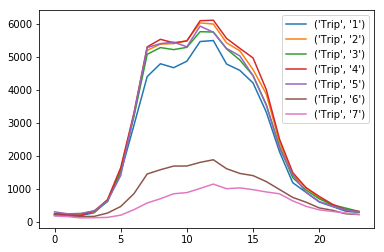

In [19]:
pp.plot(table.index, table.values)
pp.legend(table.columns)

In [20]:
file_dir='/Users/kjeong/1_Work/1_3_RMobility/INRIX/HD/'
df =pd.DataFrame(columns=['Ori','Dest','Trip','start_date','start_dow','start_hour'])
for key,value in date.items():
    for i in range(0,24):
        file_nm=file_dir+'start_date=%s/start_dow=%s/start_hour=%02d/' % (key, value,i)
        file_nm2 = glob.glob(file_nm+'*')[0]
        df_temp= pd.read_csv(file_nm2, compression='gzip', header=None, sep=',', quotechar='"', error_bad_lines=False)
        df_temp=df_temp.rename(columns={0:'Ori',1:'Dest',2:'Trip'})
        df_temp=df_temp.query('Ori >= 470000000000 and Ori <=480000000000')
        df_temp['start_date']=key
        df_temp['start_dow']=value
        df_temp['start_hour']=i
        df=df.append(df_temp)
table = pd.pivot_table(df, values=['Trip'], index=['start_hour'], columns=['start_dow'], aggfunc=np.sum, fill_value=0)        

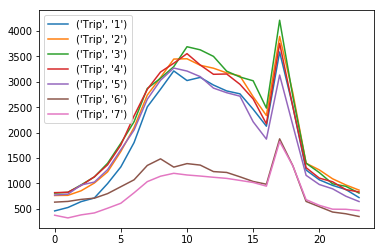

In [21]:
pp.plot(table.index, table.values)
pp.legend(table.columns)

In [22]:
date ={'2020-03-08':'7',
       '2020-03-09':'1',
       '2020-03-10':'2',
       '2020-03-11':'3',
       '2020-03-12':'4',
       '2020-03-13':'5',
       '2020-03-14':'6'}

In [23]:
file_dir='/Users/kjeong/1_Work/1_3_RMobility/INRIX/MD/'
df =pd.DataFrame(columns=['Ori','Dest','Trip','start_date','start_dow','start_hour'])
for key,value in date.items():
    for i in range(0,24):
        file_nm=file_dir+'start_date=%s/start_dow=%s/start_hour=%02d/' % (key, value,i)
        file_nm2 = glob.glob(file_nm+'*')[0]
        df_temp= pd.read_csv(file_nm2, compression='gzip', header=None, sep=',', quotechar='"', error_bad_lines=False)
        df_temp=df_temp.rename(columns={0:'Ori',1:'Dest',2:'Trip'})
        df_temp=df_temp.query('Ori >= 470000000000 and Ori <=480000000000')
        df_temp['start_date']=key
        df_temp['start_dow']=value
        df_temp['start_hour']=i
        df=df.append(df_temp)
table = pd.pivot_table(df, values=['Trip'], index=['start_hour'], columns=['start_dow'], aggfunc=np.sum, fill_value=0)        

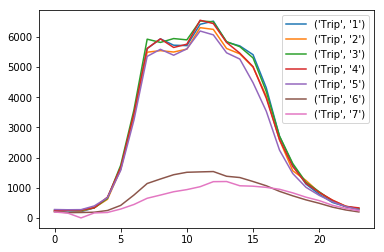

In [24]:
pp.plot(table.index, table.values)
pp.legend(table.columns)

In [25]:
file_dir='/Users/kjeong/1_Work/1_3_RMobility/INRIX/HD/'
df =pd.DataFrame(columns=['Ori','Dest','Trip','start_date','start_dow','start_hour'])
for key,value in date.items():
    for i in range(0,24):
        file_nm=file_dir+'start_date=%s/start_dow=%s/start_hour=%02d/' % (key, value,i)
        file_nm2 = glob.glob(file_nm+'*')[0]
        df_temp= pd.read_csv(file_nm2, compression='gzip', header=None, sep=',', quotechar='"', error_bad_lines=False)
        df_temp=df_temp.rename(columns={0:'Ori',1:'Dest',2:'Trip'})
        df_temp=df_temp.query('Ori >= 470000000000 and Ori <=480000000000')
        df_temp['start_date']=key
        df_temp['start_dow']=value
        df_temp['start_hour']=i
        df=df.append(df_temp)
table = pd.pivot_table(df, values=['Trip'], index=['start_hour'], columns=['start_dow'], aggfunc=np.sum, fill_value=0)        

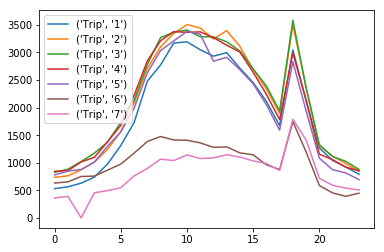

In [26]:
pp.plot(table.index, table.values)
pp.legend(table.columns)

In [27]:
date ={'2020-01-19':'7',
       '2020-01-20':'1',
       '2020-01-21':'2',
       '2020-01-22':'3',
       '2020-01-23':'4',
       '2020-01-24':'5',
       '2020-01-25':'6'}

In [28]:
file_dir='/Users/kjeong/1_Work/1_3_RMobility/INRIX/HD/'
df =pd.DataFrame(columns=['Ori','Dest','Trip','start_date','start_dow','start_hour'])
for key,value in date.items():
    for i in range(0,24):
        file_nm=file_dir+'start_date=%s/start_dow=%s/start_hour=%02d/' % (key, value,i)
        file_nm2 = glob.glob(file_nm+'*')[0]
        df_temp= pd.read_csv(file_nm2, compression='gzip', header=None, sep=',', quotechar='"', error_bad_lines=False)
        df_temp=df_temp.rename(columns={0:'Ori',1:'Dest',2:'Trip'})
        df_temp=df_temp.query('Ori >= 470000000000 and Ori <=480000000000')
        df_temp['start_date']=key
        df_temp['start_dow']=value
        df_temp['start_hour']=i
        df=df.append(df_temp)
table = pd.pivot_table(df, values=['Trip'], index=['start_hour'], columns=['start_dow'], aggfunc=np.sum, fill_value=0)   

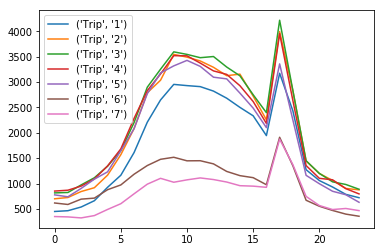

In [29]:
pp.plot(table.index, table.values)
pp.legend(table.columns)

In [30]:
date ={'2020-05-24':'7',
       '2020-05-25':'1',
       '2020-05-26':'2',
       '2020-05-27':'3',
       '2020-05-28':'4',
       '2020-05-29':'5',
       '2020-05-30':'6'}

In [31]:
file_dir='/Users/kjeong/1_Work/1_3_RMobility/INRIX/HD/'
df =pd.DataFrame(columns=['Ori','Dest','Trip','start_date','start_dow','start_hour'])
for key,value in date.items():
    for i in range(0,24):
        file_nm=file_dir+'start_date=%s/start_dow=%s/start_hour=%02d/' % (key, value,i)
        file_nm2 = glob.glob(file_nm+'*')[0]
        df_temp= pd.read_csv(file_nm2, compression='gzip', header=None, sep=',', quotechar='"', error_bad_lines=False)
        df_temp=df_temp.rename(columns={0:'Ori',1:'Dest',2:'Trip'})
        df_temp=df_temp.query('Ori >= 470000000000 and Ori <=480000000000')
        df_temp['start_date']=key
        df_temp['start_dow']=value
        df_temp['start_hour']=i
        df=df.append(df_temp)
table = pd.pivot_table(df, values=['Trip'], index=['start_hour'], columns=['start_dow'], aggfunc=np.sum, fill_value=0)

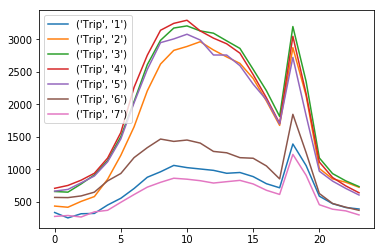

In [32]:
pp.plot(table.index, table.values)
pp.legend(table.columns)

In [30]:
date ={'2020-02-09':'7',
       '2020-02-10':'1',
       '2020-02-11':'2',
       '2020-02-12':'3',
       '2020-02-13':'4',
       '2020-02-14':'5',
       '2020-02-15':'6',
       '2020-03-08':'7',
       '2020-03-09':'1',
       '2020-03-10':'2',
       '2020-03-11':'3',
       '2020-03-12':'4',
       '2020-03-13':'5',
       '2020-03-14':'6'}

In [34]:
file_dir='/Users/kjeong/1_Work/1_3_RMobility/INRIX/HD/'
df =pd.DataFrame(columns=['Ori','Dest','Trip','start_date','start_dow','start_hour'])
for key,value in date.items():
    for i in range(0,24):
        file_nm=file_dir+'start_date=%s/start_dow=%s/start_hour=%02d/' % (key, value,i)
        file_nm2 = glob.glob(file_nm+'*')[0]
        df_temp= pd.read_csv(file_nm2, compression='gzip', header=None, sep=',', quotechar='"', error_bad_lines=False)
        df_temp=df_temp.rename(columns={0:'Ori',1:'Dest',2:'Trip'})
        df_temp=df_temp.query('(Ori >= 470000000000 and Ori <=480000000000) or (Ori >= 130000000000 and Ori <=140000000000) ')
        df_temp['start_date']=key
        df_temp['start_dow']=value
        df_temp['start_hour']=i
        df=df.append(df_temp)
table = pd.pivot_table(df, values=['Trip'], index=['start_hour'], columns=['start_dow'], aggfunc=np.sum, fill_value=0)

In [32]:
file_dir='/Users/kjeong/1_Work/1_3_RMobility/INRIX/'
look_up= pd.read_csv(file_dir+"look_up_TAZ_Census.csv")


In [160]:
dep_dist= pd.DataFrame(columns = ['TAZID','start_hour','Trip'])

In [161]:
temp_3 = df[(df.start_dow.isin(['2','3','4']))]
temp_3=temp_3.groupby(['start_hour'])['Trip'].sum().reset_index()

In [162]:
for i in range(0,look_up.shape[0]):
#for i in range(0,2):
    try:
        temp = df[(df.Ori == look_up.GEOID[i]) & (df.start_dow.isin(['2','3','4']))]
        temp=temp.groupby(['start_hour'])['Trip'].sum().reset_index()
    except:
        temp = temp_3
    
    temp_2=pd.DataFrame(columns = ['TAZID','start_hour'])
    temp_2.start_hour= np.arange(0,24)
    temp_2.TAZID =look_up.TAZID[i]
    temp_2=temp_2.merge(temp, on='start_hour', how='left')
    temp_2.Trip = temp_2.Trip.fillna(0)
    temp_2.Trip = temp_2.Trip/np.sum(temp_2.Trip)
    dep_dist=dep_dist.append(temp_2)

In [165]:
dep_dist.to_csv (r'/Users/kjeong/1_Work/1_3_RMobility/INRIX/depature_dist_by_TAZ_HD.csv', index = False, header=True)

In [166]:
file_dir='/Users/kjeong/1_Work/1_3_RMobility/INRIX/MD/'
df =pd.DataFrame(columns=['Ori','Dest','Trip','start_date','start_dow','start_hour'])
for key,value in date.items():
    for i in range(0,24):
        file_nm=file_dir+'start_date=%s/start_dow=%s/start_hour=%02d/' % (key, value,i)
        file_nm2 = glob.glob(file_nm+'*')[0]
        df_temp= pd.read_csv(file_nm2, compression='gzip', header=None, sep=',', quotechar='"', error_bad_lines=False)
        df_temp=df_temp.rename(columns={0:'Ori',1:'Dest',2:'Trip'})
        df_temp=df_temp.query('(Ori >= 470000000000 and Ori <=480000000000) or (Ori >= 130000000000 and Ori <=140000000000)')
        df_temp['start_date']=key
        df_temp['start_dow']=value
        df_temp['start_hour']=i
        df=df.append(df_temp)


IndexError: list index out of range

In [168]:
dep_dist= pd.DataFrame(columns = ['TAZID','start_hour','Trip'])

In [169]:
temp_3 = df[(df.start_dow.isin(['2','3','4']))]
temp_3=temp_3.groupby(['start_hour'])['Trip'].sum().reset_index()

In [170]:
for i in range(0,look_up.shape[0]):
#for i in range(0,2):
    try:
        temp = df[(df.Ori == look_up.GEOID[i]) & (df.start_dow.isin(['2','3','4']))]
        temp=temp.groupby(['start_hour'])['Trip'].sum().reset_index()
    except:
        temp = temp_3
    
    temp_2=pd.DataFrame(columns = ['TAZID','start_hour'])
    temp_2.start_hour= np.arange(0,24)
    temp_2.TAZID =look_up.TAZID[i]
    temp_2=temp_2.merge(temp, on='start_hour', how='left')
    temp_2.Trip = temp_2.Trip.fillna(0)
    temp_2.Trip = temp_2.Trip/np.sum(temp_2.Trip)
    dep_dist=dep_dist.append(temp_2)

In [171]:
dep_dist.to_csv (r'/Users/kjeong/1_Work/1_3_RMobility/INRIX/depature_dist_by_TAZ_MD.csv', index = False, header=True)